In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import numpy as np

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)

In [148]:
old_people=glob.glob('..\*old.csv')
print(old_people)

['..\\2010old.csv', '..\\2011old.csv', '..\\2012old.csv', '..\\2013old.csv', '..\\2014old.csv', '..\\2015old.csv', '..\\2016old.csv', '..\\2017old.csv', '..\\2018old.csv', '..\\2019old.csv']


In [149]:
old_people_year=[]

In [150]:
for csvfilename in old_people:
    df=pd.read_csv(csvfilename,'\t')
    old_people_year.append(df)

In [151]:
tset=year10_df=pd.concat([i for i in old_people_year])
year10_df_drop_col=year10_df.drop(['전체인구','전체인구.1','전체인구.2','65세이상 인구.1','65세이상 인구.2','65세이상 인구.3','65세이상 인구.4','65세이상 인구.5','65세이상 인구.6','65세이상 인구.7','65세이상 인구.8'],axis=1)

year10_df_drop_col_row=year10_df_drop_col.drop([0,1,2],axis=0)
year10_df_replace=year10_df_drop_col_row['65세이상 인구'].str.replace(',','')
print(year10_df_replace)

3      22311
4       1524
5        587
6       1534
7       2488
       ...  
447       94
448     4010
449     5623
450     5692
451     7125
Name: 65세이상 인구, Length: 4502, dtype: object


In [152]:
year10_df_drop_col_row['morethan65ages']=pd.to_numeric(year10_df_replace,errors='coerce')
year10_df_drop_col_row

<ipython-input-152-ec87c633d2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year10_df_drop_col_row['morethan65ages']=pd.to_numeric(year10_df_replace,errors='coerce')


,기간,자치구,동,65세이상 인구,morethan65ages
3,2010,종로구,소계,"22,311",22311.0
4,2010,종로구,사직동,"1,524",1524.0
5,2010,종로구,삼청동,587,587.0
6,2010,종로구,부암동,"1,534",1534.0
7,2010,종로구,평창동,"2,488",2488.0
...,...,...,...,...,...
447,2019,강동구,둔촌1동,94,94.0
448,2019,강동구,둔촌2동,"4,010",4010.0
449,2019,강동구,암사1동,"5,623",5623.0
450,2019,강동구,천호2동,"5,692",5692.0


In [153]:
year10_df=year10_df_drop_col_row[year10_df_drop_col_row['동']!='소계']
year10_filt=year10_df.groupby(['기간']).morethan65ages.sum().to_frame()
year10_filt

,morethan65ages
기간,
2010,1002770.0
2011,1049425.0
2012,1110995.0
2013,1167177.0
2014,1221616.0
2015,1267563.0
2016,1300877.0
2017,1365126.0
2018,1416131.0


In [154]:
seoul_child=pd.read_csv('저출산현황정형화그래프.csv',sep='\t')
seoul_edu=pd.read_csv('서울시사교육비정형화데이터.csv',sep='\t')

In [155]:
seoul_child

,Unnamed: 0,총합(명),남자(명),여자(명),year
0,0,91526,46853,44673,2011
1,1,93914,48353,45561,2012
2,2,84066,43181,40885,2013
3,3,83711,42899,40812,2014
4,4,83005,42370,40635,2015
5,5,75536,38744,36792,2016
6,6,65389,33485,31904,2017
7,7,58074,30137,27937,2018
8,8,53673,27811,25862,2019


In [156]:
year10_filt

,morethan65ages
기간,
2010,1002770.0
2011,1049425.0
2012,1110995.0
2013,1167177.0
2014,1221616.0
2015,1267563.0
2016,1300877.0
2017,1365126.0
2018,1416131.0


In [157]:
year10_filt['year']=year10_filt.index
year10_filt['기간(int)']=year10_filt['year'].astype('int64')
#astype으로 type을 바꿔줌.
year10 = year10_filt.drop(['year'],axis=1)
year10

,morethan65ages,기간(int)
기간,,
2010,1002770.0,2010
2011,1049425.0,2011
2012,1110995.0,2012
2013,1167177.0,2013
2014,1221616.0,2014
2015,1267563.0,2015
2016,1300877.0,2016
2017,1365126.0,2017
2018,1416131.0,2018


In [158]:
seoul_child_old = seoul_child.merge(year10,left_on='year',right_on='기간(int)')
seoul_child_old

,Unnamed: 0,총합(명),남자(명),여자(명),year,morethan65ages,기간(int)
0,0,91526,46853,44673,2011,1049425.0,2011
1,1,93914,48353,45561,2012,1110995.0,2012
2,2,84066,43181,40885,2013,1167177.0,2013
3,3,83711,42899,40812,2014,1221616.0,2014
4,4,83005,42370,40635,2015,1267563.0,2015
5,5,75536,38744,36792,2016,1300877.0,2016
6,6,65389,33485,31904,2017,1365126.0,2017
7,7,58074,30137,27937,2018,1416131.0,2018
8,8,53673,27811,25862,2019,1485272.0,2019


In [159]:
seoul_merge_rate = seoul_child_old.drop(['Unnamed: 0'],axis=1)
seoul_merge_rate

,총합(명),남자(명),여자(명),year,morethan65ages,기간(int)
0,91526,46853,44673,2011,1049425.0,2011
1,93914,48353,45561,2012,1110995.0,2012
2,84066,43181,40885,2013,1167177.0,2013
3,83711,42899,40812,2014,1221616.0,2014
4,83005,42370,40635,2015,1267563.0,2015
5,75536,38744,36792,2016,1300877.0,2016
6,65389,33485,31904,2017,1365126.0,2017
7,58074,30137,27937,2018,1416131.0,2018
8,53673,27811,25862,2019,1485272.0,2019


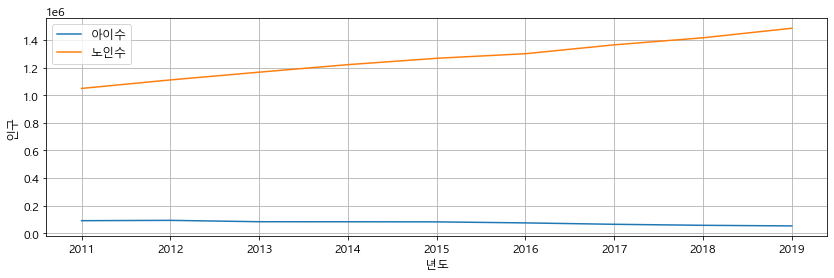

In [160]:
sns.lineplot(x='year', y='총합(명)', data=seoul_merge_rate, label='아이수')
sns.lineplot(x='year', y='morethan65ages', data=seoul_merge_rate, label='노인수')
plt.xlabel('년도')
plt.ylabel('인구')
plt.grid(True)
plt.show()

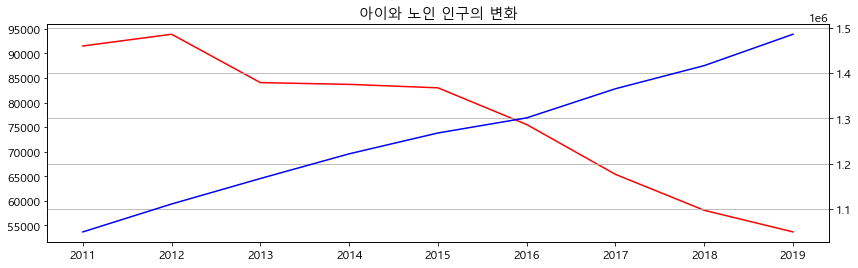

In [161]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

child = ax1.plot(seoul_merge_rate['year'], seoul_merge_rate['총합(명)'], label="아이", color='r')
old = ax2.plot(seoul_merge_rate['year'], seoul_merge_rate['morethan65ages'], label="어른", color='b')
plt.grid(True)
plt.title("아이와 노인 인구의 변화")
plt.show()

# 소멸지역 예상하기

In [162]:
seoul_child
#합치기 전의 데이터 child의 데이터

,Unnamed: 0,총합(명),남자(명),여자(명),year
0,0,91526,46853,44673,2011
1,1,93914,48353,45561,2012
2,2,84066,43181,40885,2013
3,3,83711,42899,40812,2014
4,4,83005,42370,40635,2015
5,5,75536,38744,36792,2016
6,6,65389,33485,31904,2017
7,7,58074,30137,27937,2018
8,8,53673,27811,25862,2019


In [163]:
year10_df
#그룹화 하기 전의 10년치 노인 인구 수치

,기간,자치구,동,65세이상 인구,morethan65ages
4,2010,종로구,사직동,"1,524",1524.0
5,2010,종로구,삼청동,587,587.0
6,2010,종로구,부암동,"1,534",1534.0
7,2010,종로구,평창동,"2,488",2488.0
8,2010,종로구,무악동,"1,045",1045.0
...,...,...,...,...,...
447,2019,강동구,둔촌1동,94,94.0
448,2019,강동구,둔촌2동,"4,010",4010.0
449,2019,강동구,암사1동,"5,623",5623.0
450,2019,강동구,천호2동,"5,692",5692.0


In [164]:
year_place_old = year10_df.groupby(['기간','자치구']).morethan65ages.mean().reset_index()

year_place_old['year'] = year_place_old['기간'].astype('int64')
#기간의 타입을 int로 바꿈.
year_place_old

,기간,자치구,morethan65ages,year
0,2010,강남구,2004.318182,2010
1,2010,강동구,2189.611111,2010
2,2010,강북구,3203.153846,2010
3,2010,강서구,2509.450000,2010
4,2010,관악구,2397.619048,2010
...,...,...,...,...
245,2019,용산구,2424.437500,2019
246,2019,은평구,5046.125000,2019
247,2019,종로구,1618.764706,2019
248,2019,중구,1551.666667,2019


# 기울기 구하기 

#### --------------------------------------------child 기울기--------------------------------------------

In [165]:
child_min_y=np.array(seoul_child['총합(명)'],dtype='int64').min()
child_min_y

53673

In [166]:
child_min_x=np.array(seoul_child['year'],dtype='int64').min()
child_min_x

2011

In [167]:
child_max_x=np.array(seoul_child['year'],dtype='int64').max()
child_max_x

2019

In [168]:
child_max_y=np.array(seoul_child['총합(명)'],dtype='int64').max()
child_max_y

93914

In [169]:
child_m = (child_max_y-child_min_y)/(child_max_x-child_min_x)
child_m
#child 그래프의 기울기

5030.125

#### --------------------------------------------old기울기--------------------------------------------

In [170]:
year_place_old[year_place_old['자치구']=='강남구']

,기간,자치구,morethan65ages,year
0,2010,강남구,2004.318182,2010
25,2011,강남구,2144.863636,2011
50,2012,강남구,2288.545455,2012
75,2013,강남구,2430.045455,2013
100,2014,강남구,2611.090909,2014
125,2015,강남구,2742.272727,2015
150,2016,강남구,2815.045455,2016
175,2017,강남구,2957.272727,2017
200,2018,강남구,3049.318182,2018
225,2019,강남구,3228.409091,2019


In [171]:
max_gangnam_y=np.array(year_place_old[year_place_old['자치구']=='강남구'].
                       morethan65ages,dtype='int64').max()
max_gangnam_y
#강남구인 행만 추출해서 그중 morethan65ages열이 최대인 값을 구합니다.

3228

In [172]:
min_gangnam_y=np.array(year_place_old[year_place_old['자치구']=='강남구'].
                        morethan65ages,dtype='int64').min()
#강남구인 행만 추출해서 그중 morethan65ages열이 최소인 값을 구합니다.
min_gangnam_y

2004

In [173]:
gangnam = max_gangnam_y-min_gangnam_y
gangnam/(2019-2010)

136.0

In [174]:
year_place_old

,기간,자치구,morethan65ages,year
0,2010,강남구,2004.318182,2010
1,2010,강동구,2189.611111,2010
2,2010,강북구,3203.153846,2010
3,2010,강서구,2509.450000,2010
4,2010,관악구,2397.619048,2010
...,...,...,...,...
245,2019,용산구,2424.437500,2019
246,2019,은평구,5046.125000,2019
247,2019,종로구,1618.764706,2019
248,2019,중구,1551.666667,2019


In [175]:
df_min=year_place_old.groupby(['기간','자치구']).morethan65ages.min().to_frame().reset_index()
df_place_min=df_min.groupby('자치구').morethan65ages.min()
min_value=df_place_min.to_frame().reset_index()

In [176]:
df_min=year_place_old.groupby(['기간','자치구']).morethan65ages.max().to_frame().reset_index()
df_place_max=df_min.groupby('자치구').morethan65ages.max()
max_value=df_place_max.to_frame().reset_index()

In [177]:
max_min=min_value.merge(max_value,left_on='자치구',right_on='자치구')
max_min

,자치구,morethan65ages_x,morethan65ages_y
0,강남구,2004.318182,3228.409091
1,강동구,2189.611111,3525.111111
2,강북구,3203.153846,4659.769231
3,강서구,2509.450000,4203.850000
4,관악구,2397.619048,3580.666667
5,광진구,2135.600000,3193.466667
6,구로구,2588.600000,4385.266667
7,금천구,2367.500000,3766.000000
8,노원구,2998.789474,4259.105263
9,도봉구,2727.500000,4193.857143


In [178]:
max_min['max-min']=max_min['morethan65ages_y']-max_min['morethan65ages_x']
max_min

,자치구,morethan65ages_x,morethan65ages_y,max-min
0,강남구,2004.318182,3228.409091,1224.090909
1,강동구,2189.611111,3525.111111,1335.500000
2,강북구,3203.153846,4659.769231,1456.615385
3,강서구,2509.450000,4203.850000,1694.400000
4,관악구,2397.619048,3580.666667,1183.047619
5,광진구,2135.600000,3193.466667,1057.866667
6,구로구,2588.600000,4385.266667,1796.666667
7,금천구,2367.500000,3766.000000,1398.500000
8,노원구,2998.789474,4259.105263,1260.315789
9,도봉구,2727.500000,4193.857143,1466.357143


In [179]:
max_min['기울기(m)']=max_min['max-min']-(2019-2010)
max_min

,자치구,morethan65ages_x,morethan65ages_y,max-min,기울기(m)
0,강남구,2004.318182,3228.409091,1224.090909,1215.090909
1,강동구,2189.611111,3525.111111,1335.500000,1326.500000
2,강북구,3203.153846,4659.769231,1456.615385,1447.615385
3,강서구,2509.450000,4203.850000,1694.400000,1685.400000
4,관악구,2397.619048,3580.666667,1183.047619,1174.047619
5,광진구,2135.600000,3193.466667,1057.866667,1048.866667
6,구로구,2588.600000,4385.266667,1796.666667,1787.666667
7,금천구,2367.500000,3766.000000,1398.500000,1389.500000
8,노원구,2998.789474,4259.105263,1260.315789,1251.315789
9,도봉구,2727.500000,4193.857143,1466.357143,1457.357143


In [180]:
child_m

5030.125

In [181]:
child_m_for_test=child_m

In [182]:
child_m_for_test

5030.125

In [183]:
max_min['소멸위험정도']=(child_m_for_test-max_min['기울기(m)'])/100

In [184]:
max_min['소멸위험정도(int)']=max_min['소멸위험정도'].astype('int64')
max_min

,자치구,morethan65ages_x,morethan65ages_y,max-min,기울기(m),소멸위험정도,소멸위험정도(int)
0,강남구,2004.318182,3228.409091,1224.090909,1215.090909,38.150341,38
1,강동구,2189.611111,3525.111111,1335.500000,1326.500000,37.036250,37
2,강북구,3203.153846,4659.769231,1456.615385,1447.615385,35.825096,35
3,강서구,2509.450000,4203.850000,1694.400000,1685.400000,33.447250,33
4,관악구,2397.619048,3580.666667,1183.047619,1174.047619,38.560774,38
5,광진구,2135.600000,3193.466667,1057.866667,1048.866667,39.812583,39
6,구로구,2588.600000,4385.266667,1796.666667,1787.666667,32.424583,32
7,금천구,2367.500000,3766.000000,1398.500000,1389.500000,36.406250,36
8,노원구,2998.789474,4259.105263,1260.315789,1251.315789,37.788092,37
9,도봉구,2727.500000,4193.857143,1466.357143,1457.357143,35.727679,35


In [185]:
result=max_min.drop(['소멸위험정도'],axis=1)
result

,자치구,morethan65ages_x,morethan65ages_y,max-min,기울기(m),소멸위험정도(int)
0,강남구,2004.318182,3228.409091,1224.090909,1215.090909,38
1,강동구,2189.611111,3525.111111,1335.500000,1326.500000,37
2,강북구,3203.153846,4659.769231,1456.615385,1447.615385,35
3,강서구,2509.450000,4203.850000,1694.400000,1685.400000,33
4,관악구,2397.619048,3580.666667,1183.047619,1174.047619,38
5,광진구,2135.600000,3193.466667,1057.866667,1048.866667,39
6,구로구,2588.600000,4385.266667,1796.666667,1787.666667,32
7,금천구,2367.500000,3766.000000,1398.500000,1389.500000,36
8,노원구,2998.789474,4259.105263,1260.315789,1251.315789,37
9,도봉구,2727.500000,4193.857143,1466.357143,1457.357143,35


Text(0.5, 1.0, '상대적 위험도')

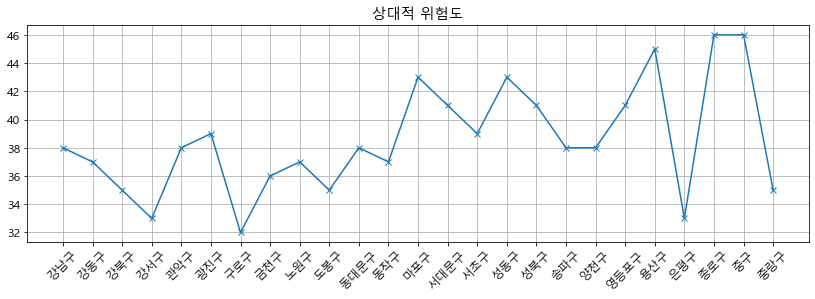

In [186]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(result['자치구'],result['소멸위험정도(int)'],'x',linestyle='-')
plt.grid(True)
plt.xticks(rotation=45)
plt.title('상대적 위험도')

# ----------------------------------인구의 총명-----------------------------------

In [187]:
year10_df

,기간,자치구,동,65세이상 인구,morethan65ages
4,2010,종로구,사직동,"1,524",1524.0
5,2010,종로구,삼청동,587,587.0
6,2010,종로구,부암동,"1,534",1534.0
7,2010,종로구,평창동,"2,488",2488.0
8,2010,종로구,무악동,"1,045",1045.0
...,...,...,...,...,...
447,2019,강동구,둔촌1동,94,94.0
448,2019,강동구,둔촌2동,"4,010",4010.0
449,2019,강동구,암사1동,"5,623",5623.0
450,2019,강동구,천호2동,"5,692",5692.0


In [188]:
tset

,기간,자치구,동,전체인구,전체인구.1,전체인구.2,65세이상 인구,65세이상 인구.1,65세이상 인구.2,65세이상 인구.3,65세이상 인구.4,65세이상 인구.5,65세이상 인구.6,65세이상 인구.7,65세이상 인구.8
0,기간,자치구,동,전체인구,전체인구,전체인구,내국인,내국인,내국인,NaN,NaN,NaN,NaN,NaN,NaN
1,기간,자치구,동,계,남자,여자,계,남자,여자,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,합계,합계,"10,575,447","5,236,742","5,338,705","1,002,770","433,322","569,448",NaN,NaN,NaN,NaN,NaN,NaN
3,2010,종로구,소계,"179,362","89,252","90,110","22,311","9,724","12,587",NaN,NaN,NaN,NaN,NaN,NaN
4,2010,종로구,사직동,"10,668","5,073","5,595","1,524",645,879,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2019,강동구,둔촌1동,283,134,149,94,35,59,93,34,59,1,1,-
448,2019,강동구,둔촌2동,"27,752","13,701","14,051","4,010","1,877","2,133","4,009","1,876","2,133",1,1,-
449,2019,강동구,암사1동,"36,693","18,145","18,548","5,623","2,472","3,151","5,609","2,466","3,143",14,6,8
450,2019,강동구,천호2동,"35,904","17,865","18,039","5,692","2,581","3,111","5,672","2,571","3,101",20,10,10


In [189]:
all_=tset.drop(['65세이상 인구','전체인구.1','전체인구.2','65세이상 인구.1','65세이상 인구.2','65세이상 인구.3',
              '65세이상 인구.4','65세이상 인구.5','65세이상 인구.6','65세이상 인구.7','65세이상 인구.8'],axis=1)
#불필요 열 제거
all_=all_.drop(all_.index[:3])
#불필요 행 삭제
all_=all_[all_['동']!='소계']
#구석구석 숨어있는 행 삭제
all_

,기간,자치구,동,전체인구
4,2010,종로구,사직동,"10,668"
5,2010,종로구,삼청동,"3,706"
6,2010,종로구,부암동,"11,648"
7,2010,종로구,평창동,"19,921"
8,2010,종로구,무악동,"8,754"
...,...,...,...,...
447,2019,강동구,둔촌1동,283
448,2019,강동구,둔촌2동,"27,752"
449,2019,강동구,암사1동,"36,693"
450,2019,강동구,천호2동,"35,904"


In [190]:
all_.columns = ['기간','자치구','동','every']
all_['everyint'],all_['year']=all_['every'].str.replace(',','').astype('int64'),all_['기간'].astype('int64')
all_

,기간,자치구,동,every,everyint,year
4,2010,종로구,사직동,"10,668",10668,2010
5,2010,종로구,삼청동,"3,706",3706,2010
6,2010,종로구,부암동,"11,648",11648,2010
7,2010,종로구,평창동,"19,921",19921,2010
8,2010,종로구,무악동,"8,754",8754,2010
...,...,...,...,...,...,...
447,2019,강동구,둔촌1동,283,283,2019
448,2019,강동구,둔촌2동,"27,752",27752,2019
449,2019,강동구,암사1동,"36,693",36693,2019
450,2019,강동구,천호2동,"35,904",35904,2019


In [191]:
all_p=all_.groupby(['year','자치구']).everyint.mean()
all_p=all_p.reset_index()
all_p.head(60)

,year,자치구,everyint
0,2010,강남구,26230.454545
1,2010,강동구,27607.722222
2,2010,강북구,26923.615385
3,2010,강서구,29025.300000
4,2010,관악구,26177.904762
5,2010,광진구,25918.333333
6,2010,구로구,30177.800000
7,2010,금천구,26454.400000
8,2010,노원구,32390.789474
9,2010,도봉구,26481.000000


In [192]:
old=pd.read_csv('노인인구정리.csv',sep='\t')
old

,Unnamed: 0,기간,자치구,morethan65ages
0,0,2010,강남구,3834.347826
1,1,2010,강동구,4148.736842
2,2,2010,강북구,5948.714286
3,3,2010,강서구,4779.904762
4,4,2010,관악구,4577.272727
...,...,...,...,...
245,220,2019,용산구,4563.647059
246,221,2019,은평구,9498.588235
247,222,2019,종로구,3057.666667
248,223,2019,중구,2909.375000


In [193]:
old_minus_all_p=all_p['everyint']-old['morethan65ages']

all_p['all-old']=old_minus_all_p

all_p

,year,자치구,everyint,all-old
0,2010,강남구,26230.454545,22396.106719
1,2010,강동구,27607.722222,23458.985380
2,2010,강북구,26923.615385,20974.901099
3,2010,강서구,29025.300000,24245.395238
4,2010,관악구,26177.904762,21600.632035
...,...,...,...,...
245,2019,용산구,15324.062500,10760.415441
246,2019,은평구,30284.125000,20785.536765
247,2019,종로구,9521.705882,6464.039216
248,2019,중구,9099.200000,6189.825000


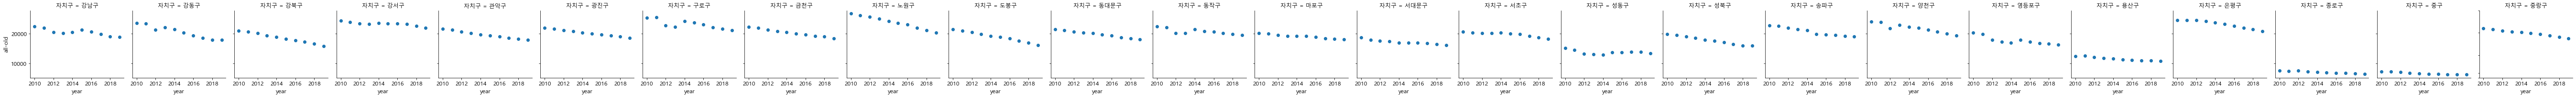

In [194]:
facet=sns.FacetGrid(all_p, col='자치구')
facet=facet.map(plt.scatter,'year','all-old')
plt.yticks([0,2000,10000,20000,30000])
plt.show()
#생산인구 + 아이

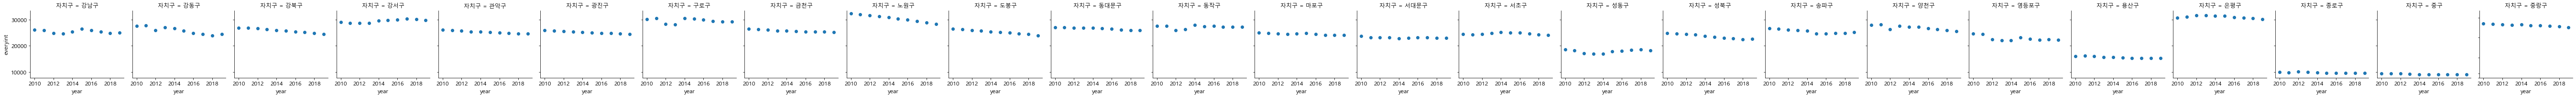

In [195]:
facet=sns.FacetGrid(all_p, col='자치구')
facet=facet.map(plt.scatter,'year','everyint')
plt.yticks([0,2000,10000,20000,30000])
plt.show()